# 1 - Hướng đi

- Nguồn tham khảo: chatGPT, github, datacamp, dataquest: 
  - https://github.com/susanli2016/Machine-Learning-with-Python
  - https://github.com/NishkarshRaj/100DaysofMLCode
  - https://github.com/Avik-Jain/100-Days-Of-ML-Code/
- Hold-out và Repeated Hold-out (đánh giá mean results, ổn định hơn) đơn giản, nhanh, dùng trong data lớn hơn. 
- Cross-Validation tận dụng tốt dữ liệu, ước lượng hiệu suất tổng thể, phát hiện và giảm overfitting tốt hơn. 

- Thử nhanh với Hold-out. 
- Thử nhanh Lasso để tìm important features. 
- Hold-out chia data - train: 2/3, 1/3 with: X, X_new1, X-new2. 
- Cross-Validation: train-evaluate Linear Reg, giảm overfitting, tăng hiệu suất with: X, X_new1, X_new2. 



# 2 - Load Data

In [1]:
# Load Data
import pandas as pd
# data = pd.read_csv("https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/saved_data.csv")
data = pd.read_csv(r"C:\Users\Administrator\OneDrive - Hanoi University of Science and Technology\ITE10 - Data Science and AI - HUST\20222\ML\Source_Codes\ML20222.PredictionBitcoin\data\saved_data.csv")
print(data)
print(data.columns)
print(len(data.columns))

            Date  BTC_close  BTC_open  BTC_high  BTC_low  BTC_volume   
0     2023-04-16    30310.3   30299.2   30545.3  30134.6       34.48  \
1     2023-04-15    30299.6   30472.6   30586.5  30208.8       31.71   
2     2023-04-14    30472.5   30387.4   30964.9  30026.0       98.38   
3     2023-04-13    30387.4   29892.4   30524.1  29864.5       65.87   
4     2023-04-12    29886.4   30209.8   30473.0  29679.5       78.69   
...          ...        ...       ...       ...      ...         ...   
4649  2010-07-24        0.1       0.1       0.1      0.1        0.50   
4650  2010-07-23        0.1       0.1       0.1      0.1        2.40   
4651  2010-07-22        0.1       0.1       0.1      0.1        2.16   
4652  2010-07-21        0.1       0.1       0.1      0.1        0.58   
4653  2010-07-20        0.1       0.1       0.1      0.1        0.26   

      Active_Addr_Cnt    Difficulty  Mean_Block_Size(in_bytes)   
0            840992.0  4.788780e+13               1.866594e+06  \
1  

# 3 - Train Model use Multi Linear Regression

Multi Linear Regression
Y = m0 + m1X1 + m2X2 + m3X3 + ... + mNXN 
- Linear Regression: Dependent variable related with independent variable in first order only.
- Multi: More than one independent variable 

## 3.0 Đóng gói def

Coefficient of determination R2: -28.0
Mean Squared Error MSE: 2900.0
Root Mean Squared Error RMSE: 53.85164807134504
Mean Absolute Error MAE: 50.0
Mean Absolute Percentage Error MAPE% 200.0%
Directional Accurancy DA%: 0.0%
   y_test  y_pred_test
0      10          -10
1      15          -15
2      20          -20
3      25          -25
4      30          -30
5      35          -35
6      40          -40


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6980\2007927158.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


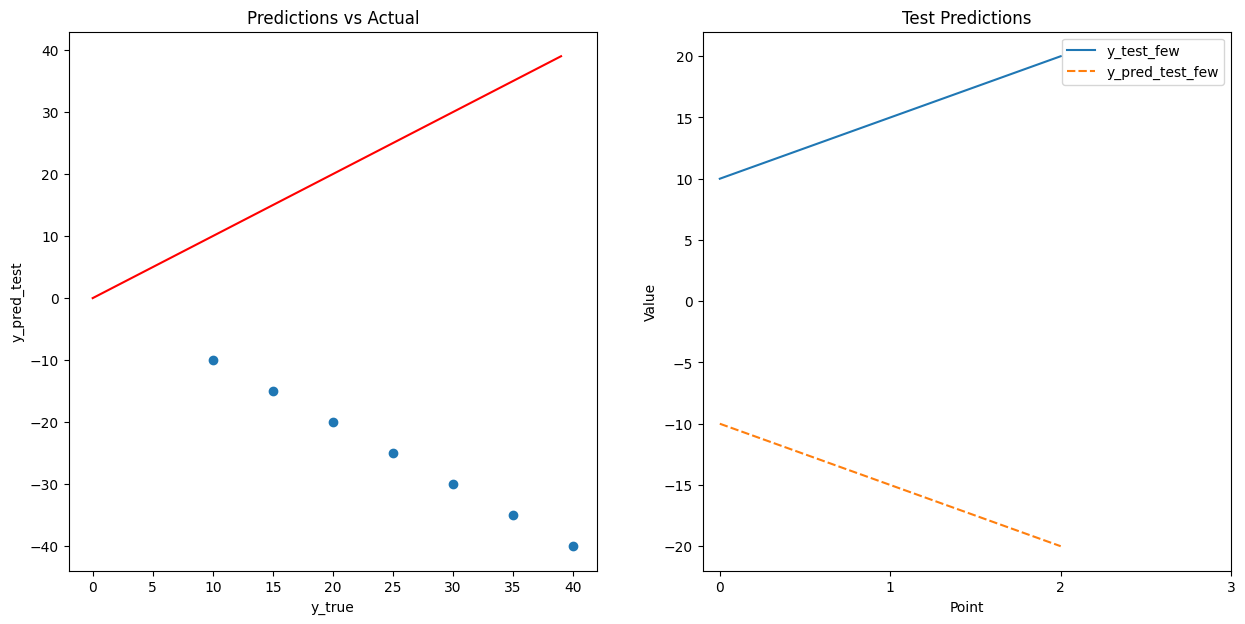

In [2]:
# Đóng gói def Evaluate_Model and def Plot_Model
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def Evaluate_Model(y_test, y_pred_test):
  """
  parameters: `y_test`, `y_pred_test`
  calculates evaluation metrics,
    including R-squared, MSE, RMSE, MAE, MAPE,
      and directional accuracy (DA) 
  """
  print('Coefficient of determination R2:', r2_score(y_test, y_pred_test)) # print(model.score(X_test, y_test))
  print('Mean Squared Error MSE:', mean_squared_error(y_test, y_pred_test))
  print('Root Mean Squared Error RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
  print('Mean Absolute Error MAE:', mean_absolute_error(y_test, y_pred_test))
  MAPE = mean_absolute_percentage_error(y_test, y_pred_test)
  # MAPE = np.mean(np.abs((np.array(y_test) - np.array(y_pred_test)) / y_test))
  print('Mean Absolute Percentage Error MAPE%', f"{round(MAPE*100, 2)}%")

  # Calculate the directional movements
  y_pred_test_direction = np.sign(np.diff(y_pred_test))  # np.sign chuyển 1/-1
  y_test_direction = np.sign(np.diff(y_test))
  compare = (y_pred_test_direction == y_test_direction) # compare 
  DA = accuracy_score(compare, np.ones_like(compare)) #[True True ... True]
  print("Directional Accurancy DA%:", f"{round(DA*100, 2)}%")
    
def Plot_Model(y_test, y_pred_test, num_samples):
  """
  Scatter Plot(Biểu đồ phân tán) with x_axis: y_test, y_axis: y_pred_test
  Print test_pred_df
  Line Plot with x_axis: position point, y_axis: Value and 2 line: y_test, y_pred_test 
  """
  # Gộp 2 Plot scatterplot and lineplot
  plt.subplots(figsize=(15,7)) # return tuple (Figure, Axes). obj Figure: toàn bộ hình ảnh, obj Axes: các vùng trực quan. 
  ax1 = plt.subplot(121)
  ax2 = plt.subplot(122)

  # Scatter plot
  ax1.scatter(y_test, y_pred_test)
  ax1.set_title("Predictions vs Actual")  #plt.title
  ax1.set_xlabel("y_true")                #plt.xlabel
  ax1.set_ylabel("y_pred_test")           #plt.ylabel

  x = range(int(max(y_test))) #vẽ đường chéo giữa.
                              # type y_test from df: <class 'pandas.core.series.Series'>, tương tự df, but have only 1 col 
  ax1.plot(x, 'r') # Opt speed, we can use x = np.arange(int(max(y_test))).astype(int)

  # Line plot with x_axis: position point, y_axis: Value and 2 line: y_test, y_pred_test 
  #1 plot vẽ tập Test nhưng show ra x 6000 điểm -> vì plot ra index của hàng ban đầu. 
  #2 Muốn plot ra tập sample với ít điểm giá trị hơn. 
  #3 Muốn plot hiện điểm 1, 2, 3, ... chứ không phải điểm 0.0, 0.5, 1.0, ...
  test_pred_df = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test}) # Create df 3 col: index, y_test, y_pred_test 
  print(test_pred_df)

  test_pred_subset_df = pd.DataFrame({'y_test_few': y_test[:num_samples], 'y_pred_test_few': y_pred_test[:num_samples]}) #2
  test_pred_subset_df = test_pred_subset_df.reset_index(drop=True) #1 Add a reset index and Remove old index
  
  # sns.lineplot(data=test_pred_subset_df) # data = df
  sns.lineplot(data=test_pred_subset_df).set(xticks=range(0, num_samples+1, int(num_samples/5)+1)) 
                                        # set x_axis ticks (dấu kiểm) hiện ít điểm hơn trên x
  ax2.set_title("Test Predictions")
  ax2.set_xlabel("Point") # tên hàng 
  ax2.set_ylabel("Value")
  plt.show() # show những plots above

y_test = [10 , 15, 20, 25, 30, 35, 40]
y_pred_test = [-10, -15, -20, -25, -30, -35, -40]
Evaluate_Model(y_test, y_pred_test)
Plot_Model(y_test, y_pred_test, 3)

## 3.1 Hold-out split data -> train Linear Reg Model

In [3]:
# Hold-out train Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data.drop(['BTC_close', 'Date'], axis=1)
y = data['BTC_close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)
y_pred_test = reg_model.predict(X_test)

Evaluate_Model(y_test, y_pred_test)

Coefficient of determination R2: 0.9996273120455348
Mean Squared Error MSE: 76162.02350749444
Root Mean Squared Error RMSE: 275.9746791057006
Mean Absolute Error MAE: 109.45370444984545
Mean Absolute Percentage Error MAPE% 733.8%
Directional Accurancy DA%: 98.32%


##  3.2 Lasso and Ridge reg

- "Regularization": "điều chuẩn": thêm norm L1 và norm L2 của vector hệ số vào hàm mất mát để giảm thiểu giá trị của hệ số. giảm thiểu overfitting và nâng cao tính tổng quát của mô hình.
- Khác với việc chuẩn hoá dữ liệu là một bước tiền xử lý dữ liệu nhằm giúp các biến đầu vào có cùng scale và phân bố -> giúp cho các mô hình có khả năng tổng quát hóa cao hơn. Tuy nhiên, việc chuẩn hoá dữ liệu không giải quyết được vấn đề overfitting, mà chỉ là một bước giúp cho mô hình hoạt động tốt hơn. 
- Sự khác nhau: 
1. Cách chọn biến: Trong Ridge Regression, tất cả các biến đều được chọn và giảm trọng số, trong khi đó, Lasso Regression sử dụng một kỹ thuật gọi là L1 regularization để xóa các biến không quan trọng hoàn toàn bằng cách thiết lập trọng số của chúng thành 0.

2. Tính chất của trọng số: Trong Ridge Regression, trọng số của các biến sẽ tiếp tục giảm dần khi ta gia tăng độ lớn của tham số `alpha`. Tuy nhiên, trong Lasso Regression, các trọng số sẽ trở thành 0 sau khi `alpha` vượt qua một ngưỡng cố định, 

- Ưu điểm và nhược điểm của Lasso Regression và Ridge Regression:

- Lasso Regression:
    - Ưu điểm:
        - Có khả năng chọn và loại bỏ các biến không quan trọng hoàn toàn, giúp cải thiện tính tổng quát của mô hình.
        - Thích hợp cho việc xử lý các bộ dữ liệu có số lượng biến lớn.
    - Nhược điểm:
        - Tính toán phức tạp hơn so với Ridge Regression vì phải giải quyết bài toán tối ưu với ràng buộc L1 regularization.
        - Không thể xử lý được khi một số biến đầu vào liên tục và có tương quan cao.

- Ridge Regression:
    - Ưu điểm:
        - Cho phép lựa chọn tất cả các biến đầu vào trong mô hình.
        - Thời gian tính toán nhanh hơn so với Lasso Regression.
        - Được sử dụng để xử lý các bộ dữ liệu có nhiễu hoặc có sự tương quan mạnh giữa các biến đầu vào.
    - Nhược điểm:
        - Không thể loại bỏ các biến đầu vào không quan trọng hoàn toàn, do đó không hiệu quả trong việc xử lý các bộ dữ liệu có số lượng biến lớn.

Coefficient of determination R2: 0.5731831606641578
Mean Squared Error MSE: 87223731.70749407
Root Mean Squared Error RMSE: 9339.364630824415
Mean Absolute Error MAE: 5406.0410746358375
Mean Absolute Percentage Error MAPE% 46642.02%
Directional Accurancy DA%: 91.36%
       y_test   y_pred_test
297   21100.7  31448.786315
2705    325.0   1680.345230
501   57210.3  24149.531315
1272   8031.4  14738.441268
3956      6.4   1613.909171
...       ...           ...
3487    142.5   1614.057725
1515   3936.6   7729.683398
4350      6.8   1613.907819
578   48130.6  20193.939466
75    23125.1  41317.031996

[1552 rows x 2 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6980\2007927158.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


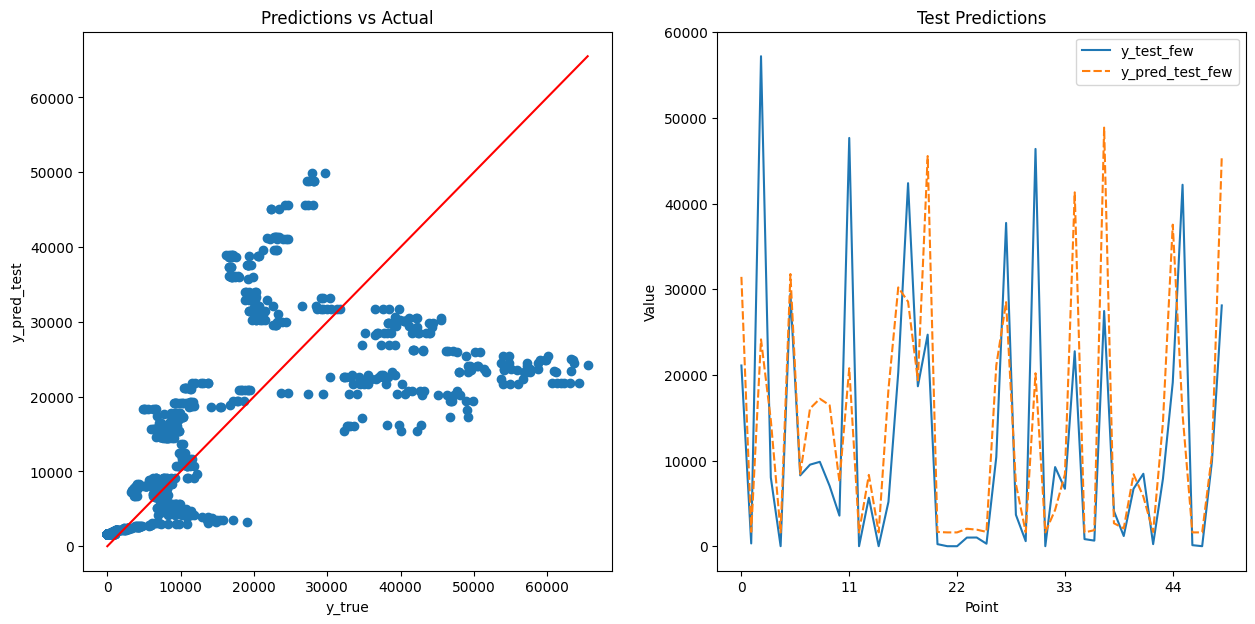

In [4]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 0.5, solver='lsqr') # lsqr: tối ưu
ridge_model.fit(X_train, y_train)
score_ridge = ridge_model.score(X_train, y_train) # score == r2

y_pred_test_ridge = ridge_model.predict(X_test)

Evaluate_Model(y_test, y_pred_test_ridge)
Plot_Model(y_test, y_pred_test_ridge, 50)

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.620e+08, tolerance: 4.824e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.579e+08, tolerance: 4.660e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

Best_alpha_Lasso: 1000
Coefficient of determination R2: 0.9994663789513974
Mean Squared Error MSE: 117114.0669028668
Root Mean Squared Error RMSE: 342.21932572966534
Mean Absolute Error MAE: 148.55422420558693
Mean Absolute Percentage Error MAPE% 598.98%
Directional Accurancy DA%: 97.96%


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.639e+08, tolerance: 7.761e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6980\2007927158.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


       y_test   y_pred_test
297   21100.7  20564.860157
2705    325.0    346.975843
501   57210.3  57656.625205
1272   8031.4   8169.468240
3956      6.4     16.507922
...       ...           ...
3103    380.5    399.853314
733   63540.9  61676.461952
1419   8716.3   8638.724783
3291    437.6    477.659578
2178   1336.3   1291.858972

[931 rows x 2 columns]


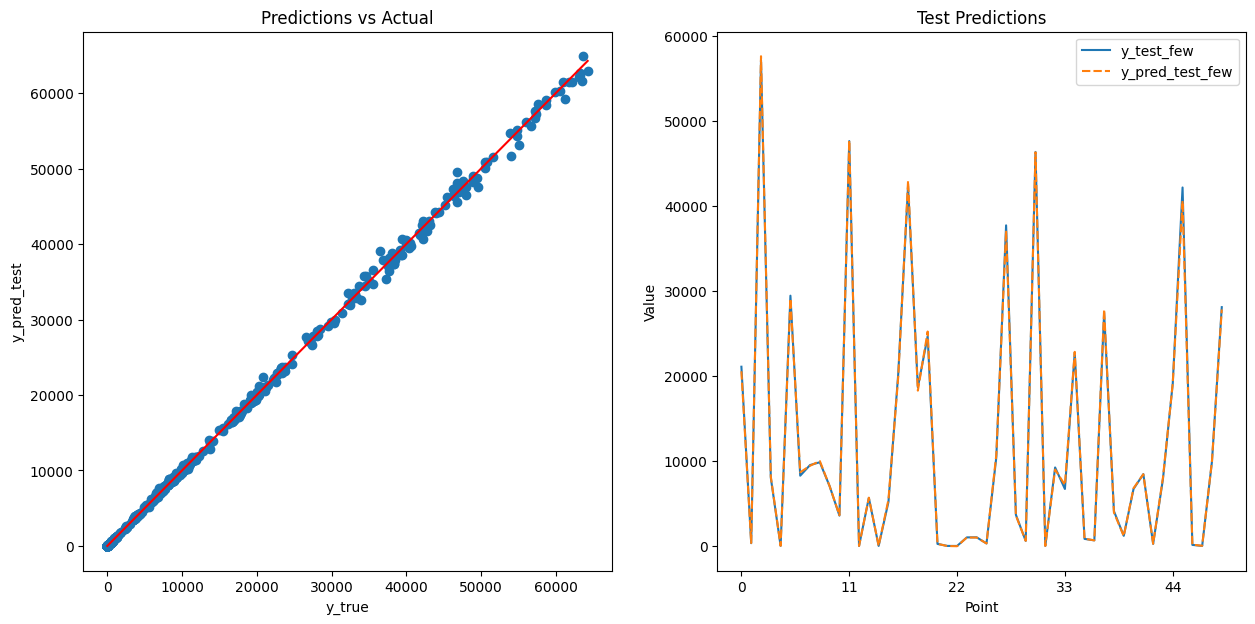

Important features: Index(['BTC_open', 'BTC_high', 'BTC_low', 'BTC_volume', 'Active_Addr_Cnt',
       'Difficulty', 'Mean_Block_Size(in_bytes)', 'Sum_Block_Weight',
       'Total_Fees(USD)', 'Mean_Hashrate', 'Xfer_Cnt', 'COPPER', 'DJI',
       'JP225'],
      dtype='object')


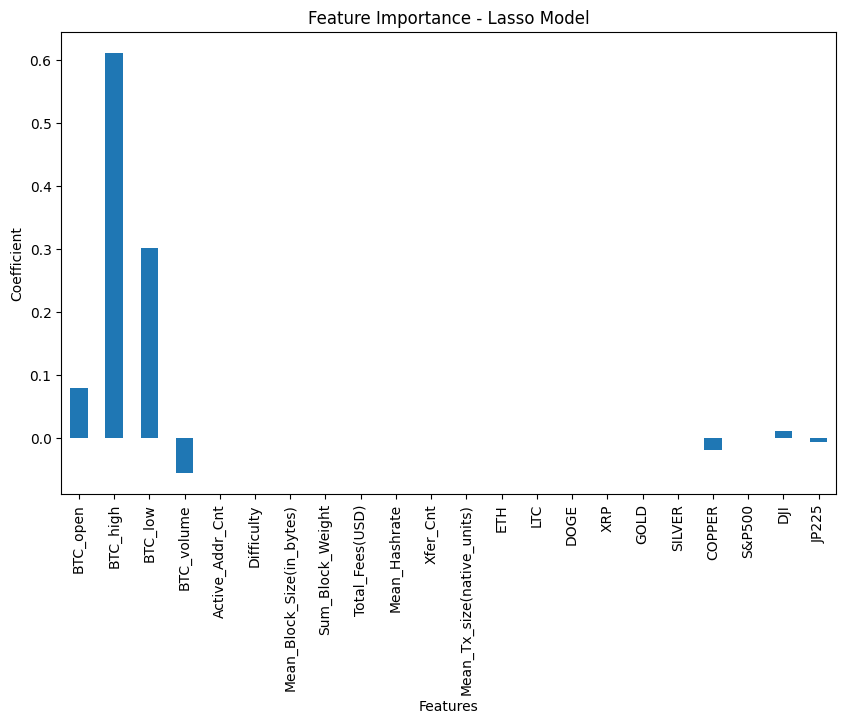

In [6]:
# Lasso tìm important features.
# Hold-out chia Train, Valid, Test: 0.7-0.15-0.15 -> alpha tốt nhất Lasso. 

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split

import matplotlib.pyplot as plt
import pandas as pd

# Chia train, valid, test: 1-... = 0.6, (0.2/0.8)*0.8=0.2, 02
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.2/0.8, random_state=42)

# Huấn luyện mô hình Lasso để tìm alpha tốt nhất
lasso_model = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}  # create parameter

grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(X_train, y_train) 

print('Best_alpha_Lasso:', grid_search.best_params_['alpha']) # lấy best alpha 

# Use best_alpha train lại model trên toàn bộ train valid
best_alpha = grid_search.best_params_['alpha']
lasso_model_best_alpha = Lasso(alpha=best_alpha)
lasso_model_best_alpha.fit(X_train_valid, y_train_valid)

y_pred_test_lasso = lasso_model_best_alpha.predict(X_test)
Evaluate_Model(y_test, y_pred_test_lasso)
Plot_Model(y_test, y_pred_test_lasso, 50)
# Quan sát coef của các features: intercept = lasso_model_best_alpha.intercept_ # bias: hệ số điều chỉnh 
coef_np = lasso_model_best_alpha.coef_      # <class 'numpy.ndarray'>
coef_pdSeries = pd.Series(lasso_model_best_alpha.coef_, index=X.columns) # tạo pandas Series obj chứa coef_ và index/gán nhãn nó = tên cột của X
        # <class 'pandas.core.series.Series'>, tương tự df, but have only 1 col, tuple (index)

# Hiển thị các important features
important_features = X.columns[coef_np != 0]
print('Important features:', important_features)

# Bar plot important features. 
plt.figure(figsize=(10, 6))
coef_pdSeries.plot(kind='bar')

plt.title('Feature Importance - Lasso Model')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()


In [8]:
# Quan sát thêm về data type
print(coef_np, type(coef_np)) 
print(coef_pdSeries, type(coef_pdSeries))

[ 7.94344496e-02  6.11451945e-01  3.01159518e-01 -5.48770371e-02
 -7.04776372e-07 -1.46128731e-11  8.47226717e-05 -2.50637449e-07
 -3.11291512e-06  1.83423510e-06 -3.23140588e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.86409968e-02  0.00000000e+00
  1.13380164e-02 -6.36882063e-03] <class 'numpy.ndarray'>
BTC_open                      7.943445e-02
BTC_high                      6.114519e-01
BTC_low                       3.011595e-01
BTC_volume                   -5.487704e-02
Active_Addr_Cnt              -7.047764e-07
Difficulty                   -1.461287e-11
Mean_Block_Size(in_bytes)     8.472267e-05
Sum_Block_Weight             -2.506374e-07
Total_Fees(USD)              -3.112915e-06
Mean_Hashrate                 1.834235e-06
Xfer_Cnt                     -3.231406e-05
Mean_Tx_size(native_units)    0.000000e+00
ETH                           0.000000e+00
LTC                           0.000000e+00
DOGE           

### Important features Lasso Linear Regression: 
1. Các important features (!=0)
Important features: Index(['BTC_open', 'BTC_high', 'BTC_low', 'BTC_volume', 'Active_Addr_Cnt',
       'Difficulty', 'Mean_Block_Size(in_bytes)', 'Sum_Block_Weight',
       'Total_Fees(USD)', 'Mean_Hashrate', 'Xfer_Cnt', 'COPPER', 'DJI',
       'JP225'],
      dtype='object')
2. 7 features nổi bật trên bar theo thứ tự: BTC_high, BTC_low, BTC open, BTC_volumn, COPPER, DJI, JP225. 

Actions: 
1. Thử nghiệm với các important features. (Loại bỏ các features không quan trọng hoặc có thể gây nhiễu).
2. Lựa chọn mô hình khác: Các important features có thể chỉ ra rằng mô hình tuyến tính như Linear Regression không đủ mạnh để mô hình hóa quan hệ phức tạp giữa các biến. Bạn có thể thử nghiệm các mô hình khác như Decision Tree, Random Forest, hoặc Gradient Boosting để xem liệu chúng có thể xử lý tốt hơn các important features.
3. Thử nghiệm các tổ hợp features: thử nghiệm các tổ hợp của các important features, (Có thể thêm hoặc nhân các features lại với nhau để tạo ra các features mới) -> subset features cải thiện hiệu suất.
Note: Việc lựa chọn quá nhiều hoặc quá ít features có thể ảnh hưởng đến hiệu suất model. -> đánh giá,thử nghiệm. 

In [9]:
X_new1 = data[['BTC_open', 'BTC_high', 'BTC_low', 'BTC_volume', 'Active_Addr_Cnt',
       'Difficulty', 'Mean_Block_Size(in_bytes)', 'Sum_Block_Weight',
       'Total_Fees(USD)', 'Mean_Hashrate', 'Xfer_Cnt', 'COPPER', 'DJI',
       'JP225']]

X_new2 = data[['BTC_open', 'BTC_high', 'BTC_low', 'BTC_volume', 'COPPER', 'DJI', 'JP225']]

Coefficient of determination R2: 0.9996118130071918
Mean Squared Error MSE: 79463.00501269766
Root Mean Squared Error RMSE: 281.89183211419527
Mean Absolute Error MAE: 108.33632104803817
Mean Absolute Percentage Error MAPE% 269.88%
Directional Accurancy DA%: 98.5%


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6980\2007927158.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


       y_test   y_pred_test
297   21100.7  20947.349730
2705    325.0    334.963129
501   57210.3  58304.816616
1272   8031.4   8130.013782
3956      6.4      2.684288
...       ...           ...
439   38709.7  38691.931890
1313  10162.5  10088.613085
1849   8547.4   8717.849156
4642      0.1     -2.072575
2005   5698.6   5644.936922

[1397 rows x 2 columns]


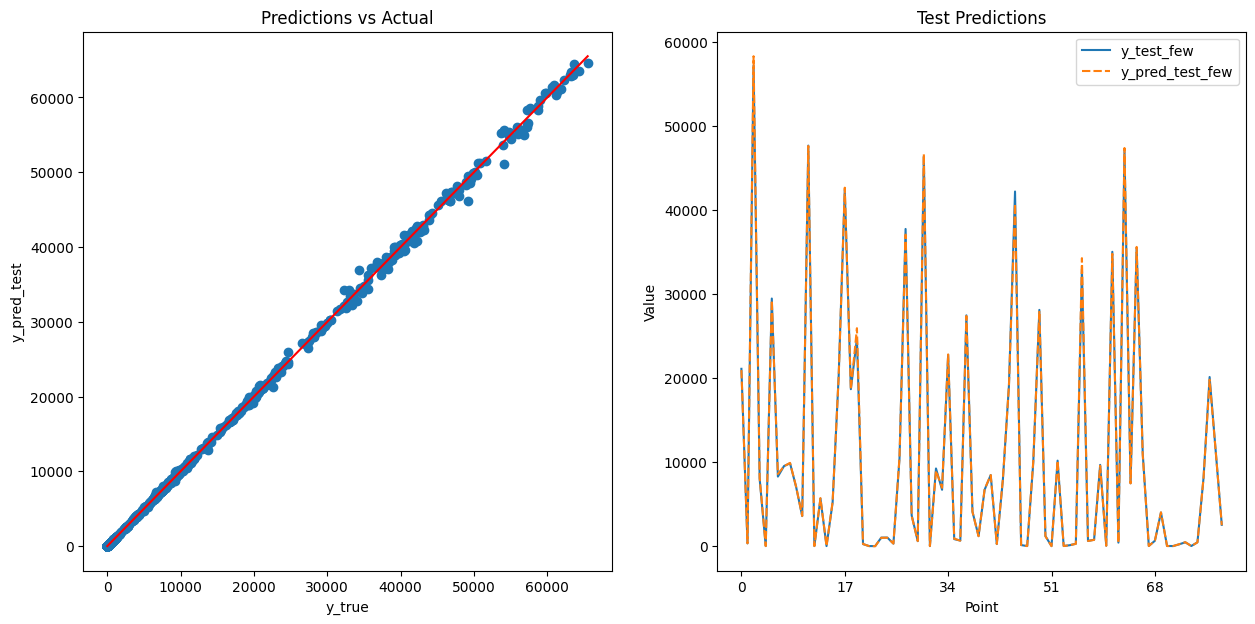


Coefficient of determination R2: 0.9996106076348962
Mean Squared Error MSE: 79709.74822291204
Root Mean Squared Error RMSE: 282.3291487305412
Mean Absolute Error MAE: 106.65038920631868
Mean Absolute Percentage Error MAPE% 192.39%
Directional Accurancy DA%: 99.5%


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6980\2007927158.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


       y_test   y_pred_test
297   21100.7  20955.645213
2705    325.0    335.134374
501   57210.3  58343.634563
1272   8031.4   8128.039925
3956      6.4      0.982787
...       ...           ...
439   38709.7  38701.780695
1313  10162.5  10076.931251
1849   8547.4   8705.190385
4642      0.1     -5.199895
2005   5698.6   5666.635640

[1397 rows x 2 columns]


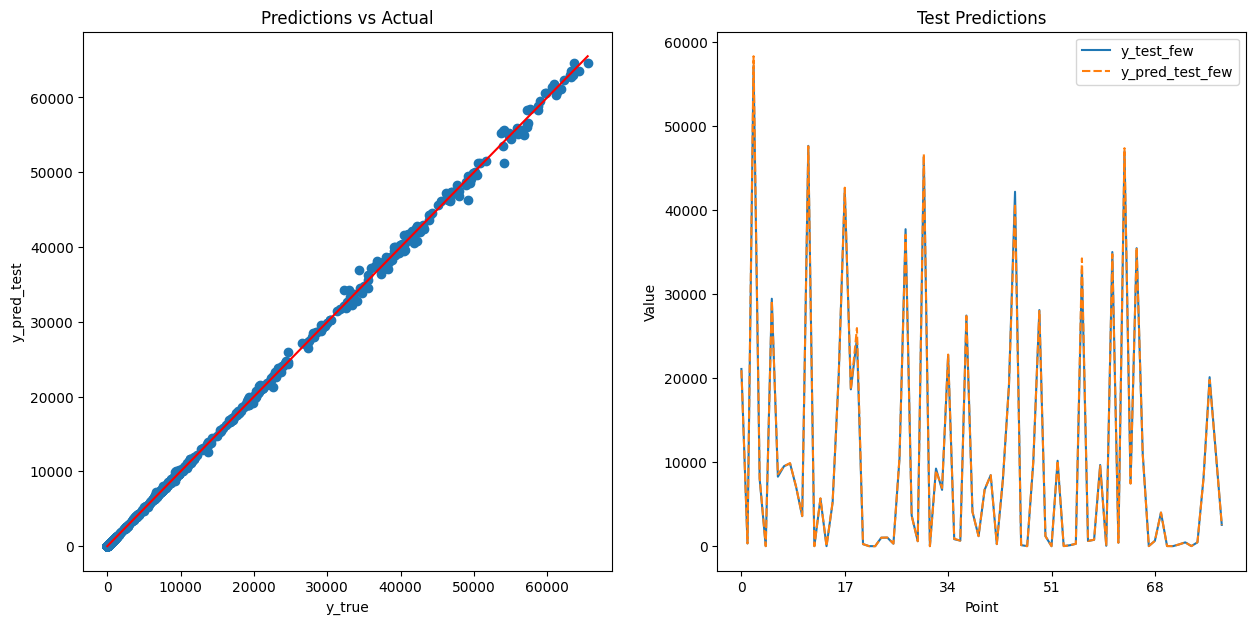

In [10]:
# Hold-out với X_new1, X_new2 

X_train, X_test, y_train, y_test = train_test_split(X_new1, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
Evaluate_Model(y_test, y_pred_test)
print()

X_train, X_test, y_train, y_test = train_test_split(X_new2, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)

Evaluate_Model(y_test, y_pred_test)
Plot_Model(y_test, y_pred_test, 80)

Coefficient of determination R2: 0.9996106291529145
Mean Squared Error MSE: 79705.34342205661
Root Mean Squared Error RMSE: 282.32134779725146
Mean Absolute Error MAE: 106.6617363378652
Mean Absolute Percentage Error MAPE% 195.27%
Directional Accurancy DA%: 99.5%
       y_test   y_pred_test
297   21100.7  20955.840861
2705    325.0    335.061100
501   57210.3  58343.570290
1272   8031.4   8127.682394
3956      6.4      1.016973
...       ...           ...
439   38709.7  38702.065777
1313  10162.5  10076.855902
1849   8547.4   8705.223476
4642      0.1     -5.277187
2005   5698.6   5666.745900

[1397 rows x 2 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6980\2007927158.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


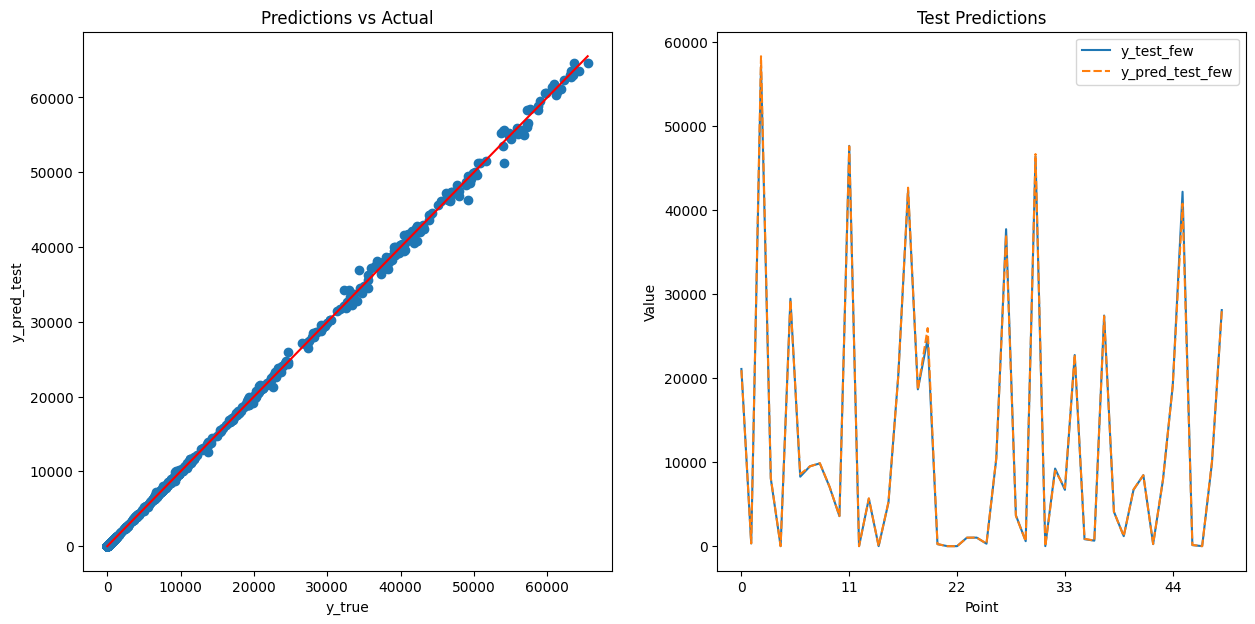

In [14]:
# Ridge Regression with X_new1, X_new2
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_new2, y, test_size=0.3, random_state=42)
ridge_model = Ridge(alpha = 0.5, solver='lsqr') # lsqr: tối ưu
ridge_model.fit(X_train, y_train)

y_pred_test_ridge = ridge_model.predict(X_test)

Evaluate_Model(y_test, y_pred_test_ridge)
Plot_Model(y_test, y_pred_test_ridge, 50)


### Đánh giá kết quả dùng Hold-out với X, X_new1, X_new2

| Metric |Hold-out|Hold-out new1|Hold-out new2|
| --- | --- | --- | --- |
|R2(~1)| 0.9996273120455348 | 0.9996118130071918 | 0.9996106076348962 |
|MSE(min)| 76162.02350749444 | 79463.00501269766 | 79709.74822291204 |
|RMSE(min)| 275.9746791057006 | 281.89183211419527 | 282.3291487305412 |
|MAE(min)| 109.45370444984545 | 108.33632104803817 | 106.65038920631868 |
|MAPE%(min) | 733.8% | 269.88% | 192.39% |
|DA% (max)| 98.32% | 98.5% | 99.5% |


## 3.2 Cross-Validation -> train+evaluate Linear Reg Model

In [ ]:
# Cross-Validtion to Train-Evaluate Linear Reg Model. 
#1 Test Cross-Valid train Linear Reg THỦ CÔNG: 
#2 Test Cross-Valid train Linear Reg DÙNG cross_val_score:
#2.1 Tính metrics R2, MSE DÙNG cross_val_score có sẵn
#2.2 Tính metrics R2, MSE theo cách MỚI, UPDATE: use cross_validate, make_scorer.

from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=7, shuffle=True, random_state=42)
model = LinearRegression()
r2_scores = []
mse_scores = []

for train_index, test_index in kf.split(X):
    # Lấy lại các giá trị tương ứng của X và y cho tập train và validation
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]

    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    r2 = r2_score(y_valid, y_pred)
    mse = mean_squared_error(y_valid, y_pred)
    r2_scores.append(r2)
    mse_scores.append(mse)

print("Coefficient of determination R2:", np.mean(r2_scores))
print("Mean Squared Error MSE:", np.mean(mse_scores))

#2 Test Cross-Valid train Linear Reg DÙNG cross_val_score:
#2.1 Tính metrics R2, MSE DÙNG cross_val_score 

reg = LinearRegression()
# Cross-validation analysis -> statistics of cross-validation metrics
kf = KFold(n_splits=7, shuffle=True, random_state=42) 

cv_scores_r2 = cross_val_score(reg, X, y, cv=kf, scoring='r2')
cv_scores_mse = cross_val_score(reg, X, y, cv=kf, scoring='neg_mean_squared_error')

mean_cv_score_r2= np.mean(cv_scores_r2)
mean_cv_scores_mse = np.mean(cv_scores_mse)

print("Mean R2:", mean_cv_score_r2)
print("Mean MSE:", mean_cv_scores_mse)

#2.2 Tính metrics R2, MSE theo 2 cách: THỦ CÔNG use cross_validate, make_scorer.
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score, accuracy_score
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, cross_validate

X = data.drop(['BTC_close', 'Date'], axis=1)
y = data['BTC_close']

model = LinearRegression() # Khởi tạo model, chưa hề fit nó với X_train, y_train

r2_scorer = make_scorer(r2_score, greater_is_better=True)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

scoring = {'R2': r2_scorer, 'MSE': mse_scorer} # Sử dụng scorer trong cross_validate:

def print_results(results):
    print("Coefficient of determination R2:", np.mean(results['test_R2']))  
    print("Mean Squared Error MSE:", -np.mean(results['test_MSE']))

results = cross_validate(model, X, y, cv=kf, scoring=scoring) #khi cv = 12 thì R âm, các chỉ số khác ra sai. cv = kf thì ngon. 
print_results(results)
print()


In [ ]:
# Tìm giá trị tối ưu nhất của k trong Cross-Validation. 
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# Dữ liệu và mô hình
X = data.drop(['BTC_close', 'Date'], axis=1)
y = data['BTC_close']
reg = LinearRegression()

r2_scores = []
mse_scores = []

for k in range(2, 20):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    cv_scores_r2 = cross_val_score(reg, X, y, cv=kf, scoring='r2')
    cv_scores_mse = - cross_val_score(reg, X, y, cv=kf, scoring='neg_mean_squared_error')
    r2_scores.append(np.mean(cv_scores_r2))
    mse_scores.append(np.mean(cv_scores_mse))

best_k_r2 = np.argmax(r2_scores) + 2  # np.argmax: cỉ số của max trong 1 danh sách 
best_k_mse = np.argmin(mse_scores) + 2

print(f"Best k_r2: {best_k_r2} and Best k_MSE: {best_k_mse}")


In [ ]:
# use cross_validate, make_scorer to Train-Evaluate Linear Reg Model. 
# with X, X_new1, X_new2
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score, accuracy_score
import numpy as np
from sklearn.model_selection import cross_validate

X = data.drop(['BTC_close', 'Date'], axis=1)
y = data['BTC_close']

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

def directional_accuracy(y_true, y_pred):
    # Calculate the directional movements
    y_pred_direction = np.sign(np.diff(y_pred))
    y_true_direction = np.sign(np.diff(y_true))
    compare = (y_pred_direction == y_true_direction)
    DA = accuracy_score(compare, np.ones_like(compare))
    return DA

# Khởi tạo model Linear Regression

model = LinearRegression()
kf = KFold(n_splits=7, shuffle=True, random_state=42)
 
# scorer R2, MSE, RMSE, MAE, MAPE và DA -> giá trị dương
r2_scorer = make_scorer(r2_score, greater_is_better=True)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=True)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
da_scorer = make_scorer(directional_accuracy, greater_is_better=False)

# Sử dụng scorer trong cross_validate:
scoring = {'R2': r2_scorer, 'MSE': mse_scorer, 'RMSE': rmse_scorer,
           'MAE': mae_scorer, 'MAPE': mape_scorer, 'DA': da_scorer}

def print_results(results):
    print("Coefficient of determination R2:", np.mean(results['test_R2']))  
    print("Mean Squared Error MSE:", -np.mean(results['test_MSE']))
    print("Root Mean Squared Error RMSE:", np.mean(results['test_RMSE']))
    print("Mean Absolute Error MAE:", -np.mean(results['test_MAE']))
    print("Mean Absolute Percentage Error MAPE%:", -np.mean(results['test_MAPE']) * 100)
    print("Directional Accuracy DA%:", -np.mean(results['test_DA']) * 100)

results = cross_validate(model, X, y, cv=kf, scoring=scoring) #khi cv = 12 thì R âm. cv = kf thì ngon. 
print_results(results)
print()
results_new1 = cross_validate(model, X_new1, y, cv=kf, scoring=scoring)
print_results(results_new1)
print()
results_new2 = cross_validate(model, X_new2, y, cv=kf, scoring=scoring)
print_results(results_new2)


# Đồ thị true_value





### Nhìn lại Hold-out với X, X_new1, X_new2 và hiển thị Cross-valid với X, X_new1, X_new2. 


|Metric|Hold-out X|Hold-out X_new1|Hold-out X_new2|
| --- | --- | --- | -------------------- |
|R2(~1)| 0.9996 | 0.9996118130071918 | 0.9996106076348962 |
|MSE(min)| 79692.15 | 79463.00501269766 | 79709.74822291204 |
|RMSE(min)| 282.30 | 281.89183211419527 | 282.3291487305412 |
|MAE(min)| 111.57 | 108.33632104803817 | 106.65038920631868 |
|MAPE%(min)| 909% | 269.88% | 192.39% |
|DA% (max)| 98.28% | 98.5% | 99.5% |

|Metric|Cross-Valid X, K=7|Cross-Valid X_new1, K=7|Cross-Valid X_new2, K=7|
|-------|------------------|-----------------------|-----------------|
|R2(~1)| 0.9996345227591791 | 0.9996353910173748 | 0.9996353910173748 |
|MSE(min)| 77654.04700920185 | 77486.90401328304 | 77486.90401328304 |
|RMSE(min)| 276.88868587550354 | 276.54194784487197 | 276.54194784487197 |
|MAE(min)|111.0196362086834  | 109.16105512719925 | 109.16105512719925 |
|MAPE%(min)| 1018.4486567727116 | 332.3362353346043 | 332.3362353346043 |
|DA% (max)| 77.59866226379337 | 79.40592362987827 | 79.40592362987827 |

## 3.3 Normalization with MinMaxScaler, StandardScaler and Lasso Reg, Ridge Reg

In [ ]:
# Chuẩn hóa MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

X_new2 = data[['BTC_open', 'BTC_high', 'BTC_low', 'BTC_volume', 'COPPER', 'DJI', 'JP225']]

scaler = MinMaxScaler()
X_new2 = scaler.fit_transform(X_new2)

X_train, X_test, y_train, y_test = train_test_split(X_new2, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)

Evaluate_Model(y_test, y_pred_test)

In [ ]:
# Chuẩn hóa StandardScaler
from sklearn.preprocessing import StandardScaler

X_new2 = data[['BTC_open', 'BTC_high', 'BTC_low', 'BTC_volume', 'COPPER', 'DJI', 'JP225']]

scaler = StandardScaler()
X_new2 = scaler.fit_transform(X_new2)

X_train, X_test, y_train, y_test = train_test_split(X_new2, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)

Evaluate_Model(y_test, y_pred_test)


In [ ]:

print(f"Coef: {model.coef_}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test)}")
print("==================================================================")
print(f"Score: {model.score(X_test, y_test)*100:.2f}%")

Đánh giá: Kết quả không được cải thiện gì nhiều khi tiến hành dùng chuẩn hóa. 

# Tổng kết: 
- Đánh giá sự quan trọng của các chỉ metrics in Model: 
 MAPE và R2 để có cái nhìn tổng quan về độ chính xác và độ mạnh của mô hình. Nếu ta quan tâm đến độ chính xác của mô hình, MAPE là một chỉ số quan trọng. Trong khi đó, nếu ta quan tâm đến độ mạnh của mô hình, R2 là một chỉ số quan trọng. Tuy nhiên, việc sử dụng MAPE hay R2 tuỳ thuộc vào bối cảnh ứng dụng cụ thể.